In [1]:
using FFTW  # For FFT and IFFT
using Plots
using Distributions
using LinearAlgebra

In [2]:
include("../modules/operations.jl");

In [3]:
# Example Noisy Signal y_k (Here you would use your actual data)
𝑓ₛ = 1024  # Sampling frequency
t = 0:1/𝑓ₛ:1-1/𝑓ₛ
xₖ = sin.(2π*5*t)  # Original signal (sinusoidal for demonstration)
vₖ = randn(length(t)) * 0.5  # White Gaussian noise
yₖ = xₖ + vₖ;  # Noisy signal

In [4]:
# Example: Define or estimate S_xx(f) and S_vv(f)
# For demonstration, let's assume some dummy PSD functions for S_xx and S_vv
𝑆ₓₓ(𝑓) = exp.(-abs.(𝑓 .- 0.5).^2 ./ 0.1)

# Assuming f is a Frequencies array or similar collection
𝑆ᵥᵥ(𝑓) = ones(length(𝑓)) .* 0.1           # Example, might not need correction but shown for consistency

# Compute the FFT of the noisy signal
𝑌ₖ = 𝓕(yₖ);

In [8]:
# Frequency vector
𝑓 = fftfreq(length(t), 1/𝑓ₛ)

# Apply Wiener Filter in Frequency Domain
𝐻𝑓 = 𝑆ₓₓ(𝑓) ./ (𝑆ₓₓ(𝑓) + 𝑆ᵥᵥ(𝑓))
𝑋̂ₖ = 𝓕⁻¹(𝑌ₖ .* 𝐻𝑓);  # Filtered signal in time domain

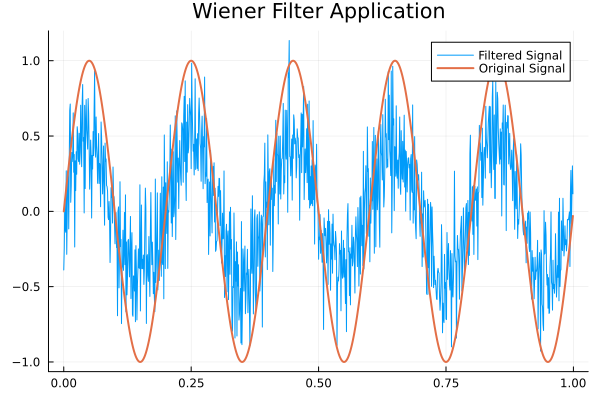

In [9]:
# Plotting
plot(t, Re(𝑋̂ₖ);
    label="Filtered Signal", title="Wiener Filter Application"
)
plot!(t, xₖ;
    label="Original Signal"
    , linewidth = 2
)